In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
index_col=0
from imblearn.over_sampling import SMOTENC

In [97]:
# Load dataset
df = pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /R_script.R/data/thp_explored_rmv_outliers.csv",index_col=0)


In [98]:
df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,Good,1,0.211725,0.211725
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,Good,1,-0.031427,-0.031427
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,Bad,0,0.199038,0.199038
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,Good,1,-2.450257,-2.450257
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,Bad,0,0.615568,0.615568


In [99]:
# Change category data to numeric values
class_replace_values = {'Good': 1, 'Bad': 0}
df['Class'] = df['Category'].replace(class_replace_values)

sex_replace_values = {'M': 1, 'F': 0}
df['Sex'] = df['Gender'].replace(sex_replace_values)

#Ensure the changes are correct
df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score,Class,Sex
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,1.256908,264,Good,1,0.211725,0.211725,1,1
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.212610,467,Good,1,-0.031427,-0.031427,1,1
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,1.469166,49,Bad,0,0.199038,0.199038,0,1
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-17.503189,908,Good,1,-2.450257,-2.450257,1,1
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,4.416875,241,Bad,0,0.615568,0.615568,0,0


In [100]:
df.columns

Index(['Youth ID', 'Gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'total_score', 'Days_in_Program', 'Category', 'Result Score',
       'fraud_score', 'mean_score', 'Class', 'Sex'],
      dtype='object')

In [118]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numerical as you've already done
class_replace_values = {'Good': 1, 'Bad': 0}
df['Class'] = df['Category'].replace(class_replace_values)

sex_replace_values = {'M': 1, 'F': 0}
df['Sex'] = df['Gender'].replace(sex_replace_values)

# Define feature columns and target
features = ['Sex', 'fraud_score']  # Ensure these are your feature columns in order
target = 'Class'

# Extract features and target
X = df[features]
Y = df[target]

# Scale only the continuous features (exclude 'Sex' which is categorical)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['fraud_score']] = scaler.fit_transform(X[['fraud_score']])

# SMOTENC needs to know which columns are categorical (0 is the index for 'Sex')
categorical_features = [0]  # 'Sex' is the first column in X_scaled

# Apply SMOTENC to handle class imbalance with categorical feature handling
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Fit and resample the data
X_resampled, Y_resampled = smote_nc.fit_resample(X_scaled, Y)

# Convert to DataFrame for easy inspection
df_resampled = pd.DataFrame(X_resampled, columns=features)  # Ensure `features` is a list of column names
df_resampled['Class'] = Y_resampled  # Add the target variable back as a column

# Check the resampled data
print(df_resampled.head())

   Sex  fraud_score  Class
0    1     0.216707      1
1    1    -0.032167      1
2    1     0.203722      0
3    1    -2.507918      1
4    0     0.630054      0


In [119]:
# Check the first 5 rows of the resampled data
print(X_resampled[:5])  # Slicing to view the first 5 rows
print(Y_resampled[:5])  # Display the first 10 elements of the target array


   Sex  fraud_score
0    1     0.216707
1    1    -0.032167
2    1     0.203722
3    1    -2.507918
4    0     0.630054
0    1
1    1
2    0
3    1
4    0
Name: Class, dtype: int64


In [120]:
from sklearn.utils import resample

# Define the number of samples you want after bootstrapping
n_samples = 100  # Desired number of samples (adjust as needed)

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=features)  # Ensure `features` is a list of column names
df_resampled['Class'] = Y_resampled

# Apply bootstrapping to increase the number of observations
df_bootstrap = resample(df_resampled, replace=True, n_samples=n_samples, random_state=42)

# Check the bootstrapped data
print(df_bootstrap.head())

    Sex  fraud_score  Class
6     1    -0.367605      1
19    1     1.283617      0
14    1    -0.222609      1
10    1    -0.826398      1
7     1     0.987133      0


In [121]:
# Define features to be used in the model
features = ['Sex', 'fraud_score']

# Extract features for X and target variable for Y
X = df[features].values
Y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df_bootstrap[features].values, df_bootstrap['Class'].values, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (80, 2) (80,)
Test set: (20, 2) (20,)


In [123]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Define the parameter grid for GridSearchCV
parameters = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(logreg, parameters, cv=10, scoring='accuracy')
logreg_cv = grid_search.fit(X_train, Y_train)

# Print the best parameters and best accuracy score
print("Logistic Regression - Best parameters:", logreg_cv.best_params_)
print("Logistic Regression - Best accuracy score:", logreg_cv.best_score_)

Logistic Regression - Best parameters: {'C': 100, 'solver': 'liblinear'}
Logistic Regression - Best accuracy score: 0.9


In [124]:
# Make predictions with the best model
yhat_logreg = logreg_cv.predict(X_test)

In [125]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Bad (0)', 'Good (1)'])
    ax.yaxis.set_ticklabels(['Bad (0)', 'Good (1)'])
    plt.show()

In [126]:
# Function to print detailed evaluation metrics
def print_evaluation_metrics(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print("\n")

Evaluation Metrics for Logistic Regression:
Confusion Matrix:
[[11  1]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Accuracy: 0.95
Precision: 0.89
Recall: 1.00
F1-Score: 0.94




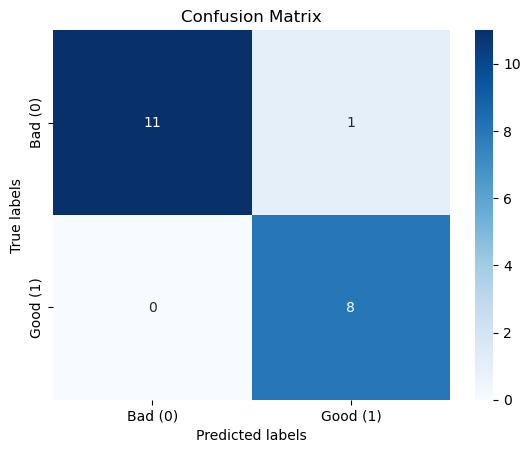

In [127]:
# Evaluate and print metrics for the Logistic Regression model with best parameters
print_evaluation_metrics("Logistic Regression", Y_test, yhat_logreg)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_logreg)

### Confusion Matrix Analysis

This confusion matrix provides a detailed look at the predictions made by a logistic regression classifier, categorizing outcomes into 'Bad (0)' and 'Good (1)'. The matrix includes a total of 20 predictions (11 + 1 + 0 + 8 = 20 instances).


**Matrix Details:**
- **True Negatives (TN):** The classifier correctly predicted 11 instances as 'Bad (0)'. These true negatives represent cases where both the actual and predicted outcomes were negative, demonstrating the classifier's effectiveness in identifying negative cases.
- **False Positives (FP):**  There was 1 instance where the classifier incorrectly predicted 'Good (1)' for a case that was actually 'Bad (0)'. This is a false positive, indicating an error in predicting a negative outcome as positive.
- **False Negatives (FN):** There were 0 cases where the classifier incorrectly predicted 'Bad (0)' for instances that were actually 'Good (1)'. This shows that the model had no errors in recognizing positive outcomes.
- **True Positives (TP):** The classifier correctly identified 8 instances as 'Good (1)'. These true positives confirm the classifier's ability to accurately predict positive outcomes.

**Summary:**
The classifier performed with a high level of accuracy, correctly predicting a majority of the outcomes. The presence of 1 false positive highlights a small area for potential improvement in the model's predictive accuracy. However, the model did not have any false negatives, which means it successfully identified all actual 'Good (1)' instances without missing any.
The overall accuracy of the model is 95%, reflecting a strong performance in distinguishing between 'Bad' and 'Good' outcomes. The precision for predicting 'Good (1)' is 0.89, and the recall is 1.00, indicating that while the model is highly accurate in capturing all positive instances, there is a slight trade-off in terms of false positives.
With an F1-Score of 0.94, the classifier shows a good balance between precision and recall, suggesting it is effective for use cases where both minimizing false positives and false negatives is important.
Overall, the logistic regression model demonstrates robust performance with minor room for improvement, particularly in reducing the occurrence of false positives.

In [133]:
# Application: Prediction with new input:
Sex=1
fraud_score=-1.849779


new_input = [[Sex, fraud_score]]  # Example input
new_input_scaled = scaler.transform(new_input)

In [134]:
# Predict using log regression:
new_output = logreg_cv.predict(new_input_scaled)
proba = logreg_cv.predict_proba(new_input_scaled)

# Extract the predicted probabilities of the first and second class
predicted_prob_0 = round(proba[0, 0] * 100, 2)
predicted_prob_1 = round(proba[0, 1] * 100, 2)

# Print the predicted class labels and probabilities as percentages
print("Predicted class label: ", new_output[0])
print("Predicted probability of class 0: ", predicted_prob_0, "%")
print("Predicted probability of class 1: ", predicted_prob_1, "%")

if new_output[0] == 0:
    print("The youth has a:", predicted_prob_0, "% chance of being discharged prior to expiration date.")
else:
    print("The youth has a:", predicted_prob_1, "% chance of successfully completing the program up to the expiration date.")
    
    

Predicted class label:  1
Predicted probability of class 0:  0.39 %
Predicted probability of class 1:  99.61 %
The youth has a: 99.61 % chance of successfully completing the program up to the expiration date.


In [132]:
df.tail()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score,Class,Sex
17,18,M,1.189950,0.889477,0.969477,0.939619,1.592749,1.145763,1.236359,0.847431,8.810825,140,Bad,0,1.254105,1.254105,0,1
18,19,F,-0.963584,0.479666,0.613462,0.939619,0.342296,0.511060,-0.671548,0.331533,1.582504,253,Good,1,0.139836,0.139836,1,0
19,20,M,1.189950,0.889477,0.969477,0.939619,1.592749,1.145763,1.236359,0.847431,8.810825,635,Bad,0,1.254105,1.254105,0,1
20,21,M,-0.694392,-0.061871,-0.940054,-1.280433,-0.519128,-0.138755,-0.524786,-1.145003,-5.304421,885,Good,1,-0.695337,-0.695337,1,1
21,22,M,-2.174947,-1.525483,-2.072826,-2.327626,-1.422233,-1.876633,-0.255722,-2.176799,-13.832269,713,Good,1,-1.849779,-1.849779,1,1
